# Solving the Simple Harmonic Oscillator
...without having to use the small angle approximation. 

Below is a template of Python code that you will use to analyze the simple harmonic oscillator, in a similar way that you did in Excel. Here, we'll look at a couple of different numerical methods that we can use to solve the SHO numerically. 

This activity is based off of [Benjamin Obi Tayo's article on Medium](https://medium.com/modern-physics/simple-pendulum-odesolver-using-python-dcb30c267eee)

## Loading Python packages 
for numerical methods and for making pretty plots.

In [53]:
import numpy as np
import matplotlib.pyplot as plt

## Implementing our ODE Solver
This ODE solver includes Euler's method, as well as two other numerical methods: the Midpoint method, and Verlet's method.

In [49]:
class ODESolver(object):
    """Second-order ODE Solver.
    Parameters
    ------------
    omega_0 : float
            initial angular velocity
    theta_0 : float
            initial angular displacement
    eta : float
        time step size
    n_iter : int
           number of steps
        
    Attributes
    -----------
    time_ : 1d-array
        Stores time values for each time step.
    omega_ : 1d-array
        Stores angular velocity values for each time step.
    theta_ : 1d-arra
       Stores angular displacement values for each time step.
        
    Methods
    -----------
    euler(alpha): Implements the Euler algorithm for the acceleration function alpha.
    
    midpoint(alpha): Implements the Midpoint algorithm for the acceleration function alpha.
    
    verlet(alpha): Implements the Verlet algorithm for the acceleration function alpha.
    """
    def __init__(self, omega_0 = 0, theta_0 = 10, delta_t=0.01, n_iter=10):
        self.omega_0 = omega_0
        self.theta_0 = theta_0
        self.delta_t = delta_t
        self.n_iter = n_iter
        
    def euler(self,alpha):
        """Implements Euler Method.
        
        Parameters
        ----------
        alpha : acceleration function
        
        Returns
        -------
        self : object
        """
        self.time_ = np.zeros(self.n_iter)
        self.omega_ = np.zeros(self.n_iter)
        self.theta_ = np.zeros(self.n_iter)
        self.omega_[0] = self.omega_0
        self.theta_[0] = self.theta_0*np.pi/180.0
        
        for i in range(self.n_iter-1):
            self.time_[i+1] = self.time_[i] + self.delta_t
            self.omega_[i+1] = self.omega_[i] + self.delta_t*alpha(self.theta_[i])
            self.theta_[i+1] = self.theta_[i] + self.delta_t*self.omega_[i]
        return self
    
    def midpoint(self,alpha):
        """Implement Midpoint Method.
        
        Parameters
        ----------
        alpha : acceleration function
        Returns
        -------
        self : object
        """
        self.time_ = np.zeros(self.n_iter)
        self.omega_ = np.zeros(self.n_iter)
        self.theta_ = np.zeros(self.n_iter)
        self.omega_[0] = self.omega_0
        self.theta_[0] = self.theta_0*np.pi/180.0
        
        for i in range(self.n_iter-1):
            self.time_[i+1] = self.time_[i] + self.delta_t
            self.omega_[i+1] = self.omega_[i] + self.delta_t*alpha(self.theta_[i])
            self.theta_[i+1] = self.theta_[i] + 0.5*self.delta_t*(self.omega_[i]+self.omega_[i+1])
        return self
    
    def verlet(self,alpha):
        """Implement Verlet Method.
        
        Parameters
        ----------
        alpha : acceleration function
        Returns
        -------
        self : object
        """
        self.time_ = np.zeros(self.n_iter)
        self.theta_ = np.zeros(self.n_iter)
        self.theta_[0] = self.theta_0*np.pi/180.0
        self.time_[1]= self.delta_t
        self.theta_[1] = self.theta_[0]+self.omega_0*self.delta_t +0.5* (self.delta_t**2)*alpha(self.theta_[0])
        
        for i in range(self.n_iter-2):
            self.time_[i+2] = self.time_[i+1] + self.delta_t
            self.theta_[i+2] = 2.0*self.theta_[i+1] -self.theta_[i] + (self.delta_t**2)*alpha(self.theta_[i+1])
        return self

In [99]:
def alpha(x):
    g = 9.8
    L = 0.627
    return -(g/L)*np.sin(x)

## Solving the SHO
and outputting a plot to see if it has the expected behavior

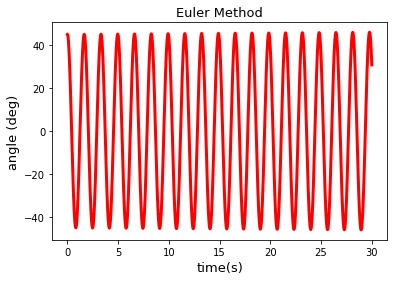

In [101]:
# create a list of times
time=ODESolver(omega_0 = 0, theta_0 = 45, delta_t=0.0001, n_iter=300000).euler(alpha).time_
# create a list of solved angles
theta=ODESolver(omega_0 = 0, theta_0 = 45, delta_t=0.0001, n_iter=300000).euler(alpha).theta_

# plot the results
plt.plot(time,theta*180/np.pi,lw=3,color='red')
plt.xlabel('time(s)',size=13)
plt.ylabel('angle (deg)',size=13)
plt.title('Euler Method',size=13)
plt.show()

By changing the values of `start` and `end` below, try and isolate a graph of a single period of the pendulum's motion. Make sure that the values of `start` and `end` don't go beyond what you defined in `n_iter` above. 

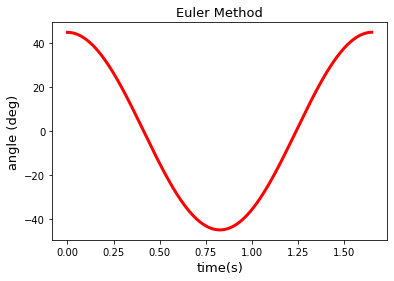

In [104]:
# plot the results for only one period
start=0
end=16500
plt.plot(time[start:end],theta[start:end]*180/np.pi,lw=3,color='red')
plt.xlabel('time(s)',size=13)
plt.ylabel('angle (deg)',size=13)
plt.title('Euler Method',size=13)
plt.show()

In [105]:
# once you tune your graph above to approximately one period, this should give the period of one oscillation in your model
time[end]

1.6499999999998347

future ideas: plot the period as a function of theta_0?